# "Monte Carlo Integration with Python"


- toc: true
- branch: master
- badges: true
- comments: true
- author: Kim Jeewoo
- categories: [Python]
- image: images/monte_logo.gif

# Monte Carlo Integration

# Problem 

Find $\int_0^1 (x + sin(\pi x))\,dx$.

## Solution I - Analytic Sol

$\int_0^1 (x + sin(\pi x))\,dx = \left[\cfrac{1}{2} x^2-\cfrac{1}{\pi}cos(\pi x)\right]_0^1 = \cfrac{1}{2} + \cfrac{1}{\pi} + \cfrac{1}{\pi} = \cfrac{1}{2}+\cfrac{2}{\pi}$

## Solution II - Monte Carlo Integration in Python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

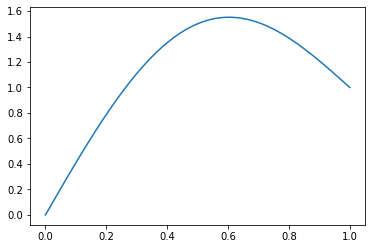

In [3]:
def function(x):
    return x + np.sin(np.pi*x)

x = np.linspace(0, 1, 10000)
y = [function(x) for x in x]
plt.plot(x, y)
plt.show()

In [4]:
def function(x): #함수 정의
    return x + np.sin(np.pi*x)

N = 5000  # Random Sampling 시행 횟수

width = 1  # 사각형의 가로 길이
height = 1.6  #사각형의 세로 길이

X = np.random.random(N)   # 0~1까지의 x 좌표 Random Sampling을 N번 시행
rand_Y = height * np.random.random(N) # 그래프상 최솟값 ~ 최댓값까지의 y 좌표 Randon Sampling을 N번 시행

in_or_out = rand_Y < function(X)  # rand_Y < FX (IN)이면 True, Y > F (OUT)이면 False
A = height * width * np.sum(in_or_out) / N # 영역 S의 넓이

print('이론적으로 구한 값 : {0} \
      \n샘플링으로 구한 값 : {1}'.format(1/2 + 2/np.pi, A))


이론적으로 구한 값 : 1.1366197723675815       
샘플링으로 구한 값 : 1.12864


### Visualization

In [5]:
from matplotlib.animation import FuncAnimation

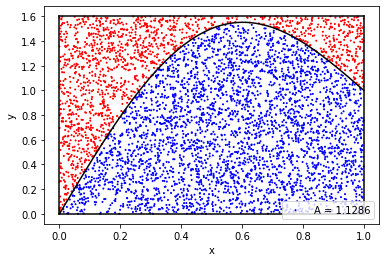

In [6]:
color = list(map(lambda x: 'blue' if x == True else 'red', in_or_out)) #색 정하기

x = np.linspace(0, 1, 10000) #함수 그리기
y = [function(x) for x in x]
plt.plot(x, y, color = 'black')

plt.scatter(X, rand_Y, color = color, s=1, label='A = {0}'.format(np.round(A, 4)))
plt.legend(loc = 'lower right') #범례(legend) 위치
               
plt.plot([0, width], [0, 0], color='black') # 사각형 영역
plt.plot([width, width], [0, height], color='black')
plt.plot([0, width], [height, height], color='black')
plt.plot([0, 0], [0, height], color='black')

plt.xlabel('x')
plt.ylabel('y')

plt.show()